In [6]:
import pandas as pd
import csv
from scipy.stats import norm
import statistics
%matplotlib inline
import sklearn
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('auctions.csv')
data.rename(columns = {'RoR': 'return_on_reserve',
                      'STR': 'lots_sold',
                      'BPL': 'bidders_per_lot'}, inplace = True)
data['total_sales'] = (data.avg_reserve+(data.avg_reserve * data.return_on_reserve))*(data.lots * data.lots_sold)
data['return_on_reserve'] = data.avg_reserve * data.return_on_reserve
data['lots_sold'] = (data.lots_sold * data.lots).astype(int)
data['bidders_per_auction'] = (data.bidders_per_lot * data.lots).astype(int)
del data['bidders_per_lot']
data = np.round(data,decimals=2)
data.head()

,auction_id,return_on_reserve,lots_sold,lots,product_types,avg_start_bid,avg_reserve,auction_mech,state,total_sales,bidders_per_auction
0,100,10844.21,54,108,0.77,0.0,10568.25,SealedBid,MD,1163434.04,899
1,101,6764.70,7,7,1.00,0.0,4805.62,EnglishForward,TX,80992.25,39
2,102,0.00,0,2,1.00,0.0,3550.00,SealedBid,MD,0.00,0
3,103,6801.55,3,3,0.33,0.0,7693.88,FixedPrice,NE,43486.27,3
4,104,8423.74,90,90,0.61,0.0,8661.11,EnglishForward,NY,1537636.32,408


In [3]:
data.corr()

,auction_id,return_on_reserve,lots_sold,lots,product_types,avg_start_bid,avg_reserve,total_sales,bidders_per_auction
auction_id,1.000000,0.001538,-0.000072,-0.020555,0.026288,-0.044984,0.003715,0.017753,0.004159
return_on_reserve,0.001538,1.000000,-0.011940,0.024040,0.008829,0.042082,0.996961,0.015046,0.005298
lots_sold,-0.000072,-0.011940,1.000000,0.673585,-0.232996,-0.012531,-0.020657,0.876429,0.806669
lots,-0.020555,0.024040,0.673585,1.000000,-0.350416,0.377427,0.016265,0.588926,0.702265
product_types,0.026288,0.008829,-0.232996,-0.350416,1.000000,-0.015723,0.012568,-0.169965,-0.216101
avg_start_bid,-0.044984,0.042082,-0.012531,0.377427,-0.015723,1.000000,0.042403,-0.001392,-0.003372
avg_reserve,0.003715,0.996961,-0.020657,0.016265,0.012568,0.042403,1.000000,0.006669,-0.002322
total_sales,0.017753,0.015046,0.876429,0.588926,-0.169965,-0.001392,0.006669,1.000000,0.775245
bidders_per_auction,0.004159,0.005298,0.806669,0.702265,-0.216101,-0.003372,-0.002322,0.775245,1.000000


Text(0.5, 1.0, 'Correlation Matrix for Auctions 2019')

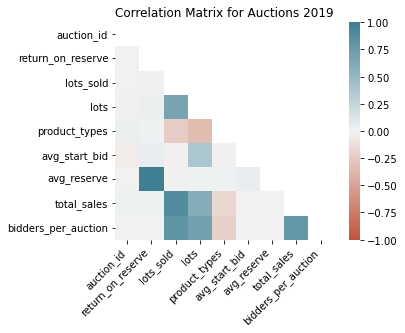

In [14]:
matrix = np.triu(corr)
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    mask=matrix,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_title('Correlation Matrix for Auctions 2019')

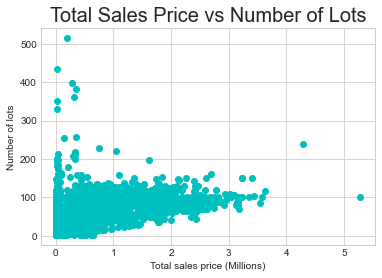

In [16]:
plt.style.use('seaborn-whitegrid')
x = data.total_sales/1e6
y = data.lots
plt.scatter(x, y, color = 'c')
plt.xlabel('Total sales price (Millions)')
plt.ylabel('Number of lots')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,527865))
plt.title('Total Sales Price vs Number of Lots', fontsize = 20)
plt.show()

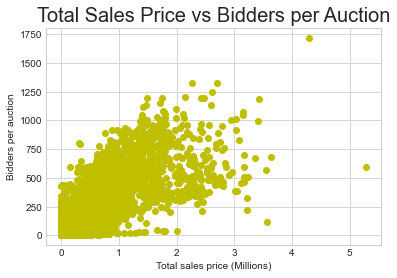

In [17]:
x = data.total_sales/1e6
y = data.bidders_per_auction
plt.scatter(x, y, color = 'y')
plt.xlabel('Total sales price (Millions)')
plt.ylabel('Bidders per auction')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,527865))
plt.title('Total Sales Price vs Bidders per Auction', fontsize = 20)
plt.show()

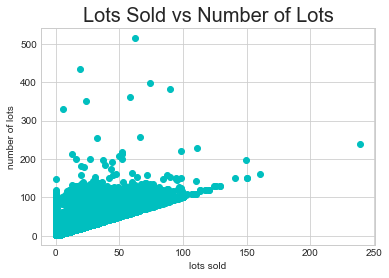

In [9]:
x = data.lots_sold
y = data.lots
plt.scatter(x, y, color = 'c')
plt.xlabel('Lots sold')
plt.ylabel('Number of lots')
plt.title('Lots Sold vs Number of Lots', fontsize = 20)
plt.show()

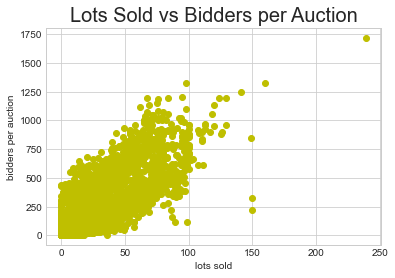

In [10]:
x = data.lots_sold
y = data.bidders_per_auction
plt.scatter(x, y, color = 'y')
plt.xlabel('Lots sold')
plt.ylabel('Bidders per auction')
plt.title('Lots Sold vs Bidders per Auction', fontsize = 20)
plt.show()

Text(0.5, 1.0, 'Auction type vs Total Sales')

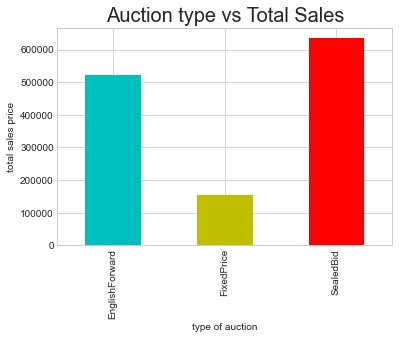

In [11]:
data.groupby('auction_mech')['total_sales'].mean().plot(kind = 'bar', color = ['c','y','r']);

plt.xlabel('type of auction')
plt.ylabel('total sales price')
plt.title('Auction type vs Total Sales', fontsize = 20)

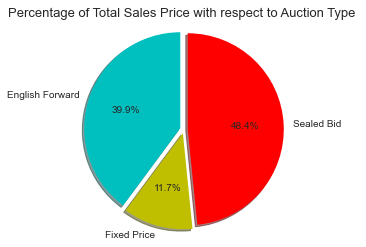

In [12]:
labels = 'English Forward', 'Fixed Price', 'Sealed Bid'
sizes = data.groupby('auction_mech')['total_sales'].mean()
explode = (0.04,0.04,0.04)
colors = ['c','y','r']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, explode = explode, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title('Percentage of Total Sales Price with respect to Auction Type', fontsize = 13)

plt.show()